# Seattle AirBnb Listings Dataset Analysis

## Introduction

This notebook develops an analysis of the [Seattle AirBnb Open Data on Kaggle](https://www.kaggle.com/airbnb/seattle) data to determine if it is possible to predict the listing price, using the CRISP-DM methodology.

The main questions to answer in this project are:
1. Do the reviews impact listing price? Are only the property specifications relevant for pricing?
2. What is the distribution of prices in the neighborhoods of Seattle? What is the most expensive? What is the cheapest?
3. Is the price linearly related to the variables analyzed in question 2? Is it possible to predict the price by implementing a linear algorithm? How accurate is it?

## 1. Business Context
According to [Seattle AirBnb Open Data on Kaggle](https://www.kaggle.com/airbnb/seattle):
* Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.
* The Airbnb data consist of 3 files with information as follow:
    * Listings, including full descriptions and average review score
    * Reviews, including unique id for each reviewer and detailed comments
    * Calendar, including listing id and the price and availability for that day   


## 2. Data Understanding

The fundamental libraries to work with this notebook are:

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings("ignore")
%matplotlib inline

# Set Up
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### 2.1 Exploratory Data Analysis

In this project, the analysis will be limited to the Listings data because this dataset contains all the necessary information to answer the main questions. The full data dictionary can be consulted [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

In [2]:
# Loading Data
df_listings= pd.read_csv('./Data/listings.csv')
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

Let's see what information the database has

In [3]:
print("df_listings columns:")
print(df_listings.columns)
print()
print("-------------")
print()
print("df_listings shape:", df_listings.shape)
print()
print("-------------")
print()
print("df_listings data info:")
df_listings.info()

df_listings columns:
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_

---

* The listings file has many columns, but in a first approximation, we can be seen that the information has four fundamental topics: listing information, host information, property information, and review information 
---

Some columns have null values or are completely empty. It is important to identify these columns for further processing

In [4]:
df_temp = pd.DataFrame((np.sum(df_listings.isnull()) / len(df_listings)), columns=['Null Rate'])
df_temp[df_temp['Null Rate']>0].sort_values(by = ['Null Rate'], ascending=False)

,Null Rate
license,1.000000
square_feet,0.974594
monthly_price,0.602672
security_deposit,0.511262
weekly_price,0.473808
notes,0.420639
neighborhood_overview,0.270299
cleaning_fee,0.269775
transit,0.244631
host_about,0.224987


------
For this project, the analysis is focused on the variable "price", and it is interesting to review its interaction with the other variables. Since the listing information and the host's personal information are informative and for AirBnB's management, the next step is to analyze the interaction between the variables associated with the customer reviews and the property's characteristics against the price variable.

**Note:** Theoretically, the price should be associated with money (float) and the "host_is_superhost" could be boolean since contains "t" or "f" values. We could correct it deleting the "$" character in price variable, and coding "t" as 1 and "f" as 0.

------

In [5]:
print("Original Price and host_is_superhost columns format:")
print(df_listings[['price', 'host_is_superhost']].head(5))

df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].map({'t': 1, 'f': 0})

print()
print("------------------")
print()

print("Reformatted Price and host_is_superhost columns:")
print(df_listings[['price', 'host_is_superhost']].head(5))


Original Price and host_is_superhost columns format:
     price host_is_superhost
0   $85.00                 f
1  $150.00                 t
2  $975.00                 f
3  $100.00                 f
4  $450.00                 f

------------------

Reformatted Price and host_is_superhost columns:
   price  host_is_superhost
0   85.0                0.0
1  150.0                1.0
2  975.0                0.0
3  100.0                0.0
4  450.0                0.0


### Do the reviews impact listing price? Are only the property specifications relevant for pricing?

The first interaction analysis will be developed for some variables associated with customer reviews and price. Let's see how the customer reviews variables interact with each other with a correlation matrix.

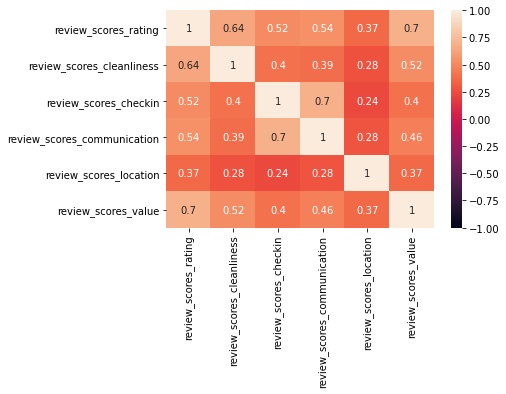

In [6]:
# Interactions of detailed review variables
df_review_interaction_detailed = df_listings[["review_scores_rating", 'review_scores_cleanliness', 'review_scores_checkin', 
                                     'review_scores_communication', 'review_scores_location', 'review_scores_value']]
sns.heatmap(df_review_interaction_detailed.corr(), vmin=-1, vmax=1, annot=True);

An interesting behavior is in the variable of "review_scores_rating" since it seems that all the other variables are highly correlated with it.

In [7]:
#Correlation within review_scores_rating and detailed reviews scores
pd.DataFrame(df_review_interaction_detailed.corr()["review_scores_rating"])

,review_scores_rating
review_scores_rating,1.000000
review_scores_cleanliness,0.642882
review_scores_checkin,0.521813
review_scores_communication,0.540620
review_scores_location,0.368423
review_scores_value,0.696534


The detailed review score variables are highly correlated with the review_scores_rating variable. This could be interpreted as that the variable "review_scores_rating" is a general consolidated of the others detailed variables. Only the *review_scores_rating* variable could be used as an overview of all reviews scores.

Now we will see how the variables associated with reviews are related to the price of the property using scaters and bar plots, and a correlation matrix

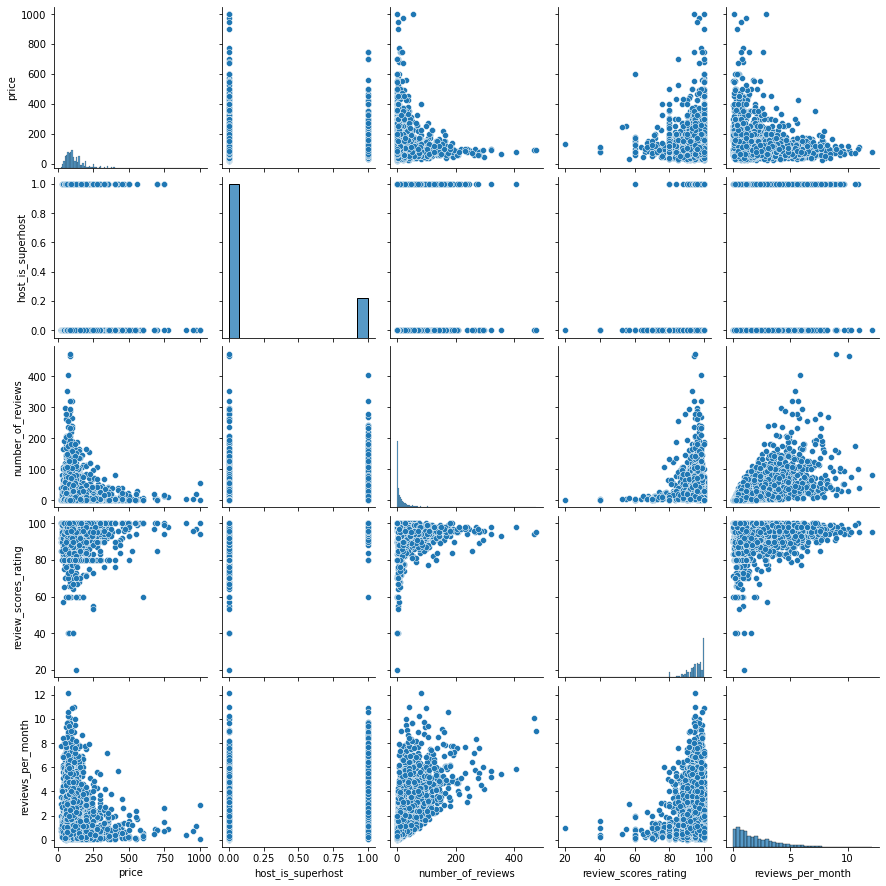

In [8]:
# Interactions of general review variables
df_review_interaction = df_listings[["price", "host_is_superhost", "number_of_reviews", "review_scores_rating", "reviews_per_month"]]

sns.pairplot(df_review_interaction);

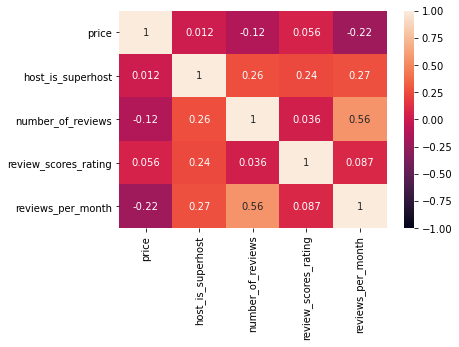

In [9]:
sns.heatmap(df_review_interaction.corr(), vmin=-1, vmax=1, annot=True);

----
Some conclusions for these variables could be:
* If the host has a low general score, it could represent a low price in listing. 
* If the listing has a lot of reviews, the price tends to be lower, and if the reviewer has a high number of reviews per month, then the cost tends to be lower. It is interesting
* If the listing has a high score rating, the price tends to be higher. It makes sense, and it's strongly associated with individual scores. In general, if all review scores are high, the price tends to increase.
* However, there is no strong correlation between general reviews score and price

----

Next interaction analysis with property characteristics variables and price will be developed. 
We are going to see the relationship of the variables associated with the physical structure of the property with the price. We will again use scatter an bar plots, and a correlation matrix

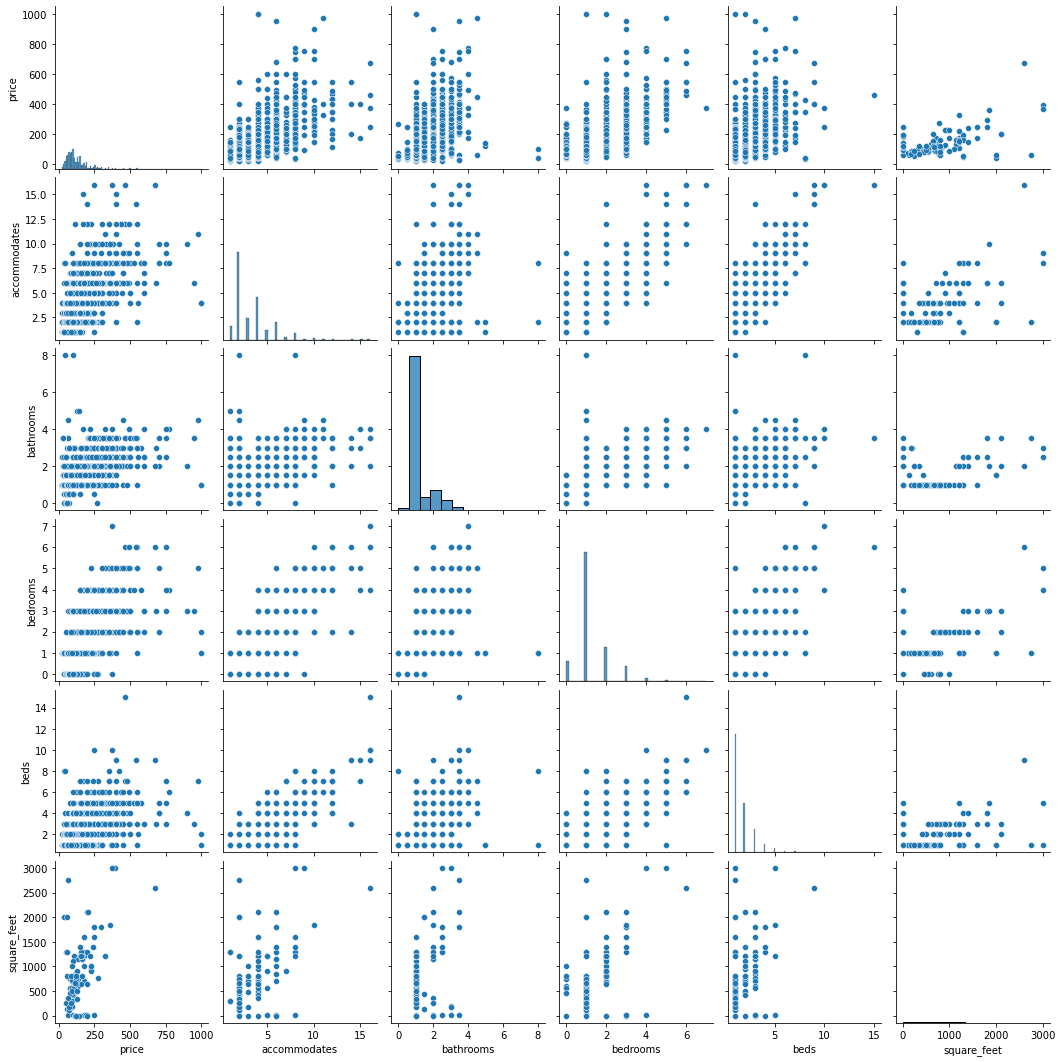

In [10]:
# Interactions of property variables
df_property_interaction = df_listings[["price", 'accommodates', 'bathrooms', 'bedrooms', 'beds','square_feet']]
sns.pairplot(df_property_interaction);

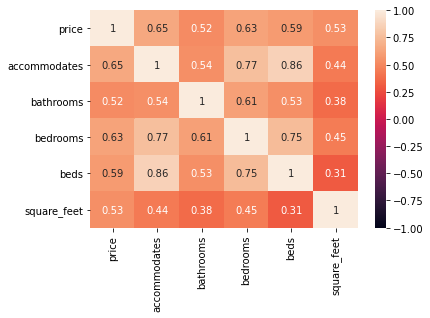

In [11]:
sns.heatmap(df_property_interaction.corr(), vmin=-1, vmax=1, annot=True);

----
Some conclusions for these variables could be:
* If the property has more bedrooms or bathrooms, the price increases. This is also observed in the variable of "square_feet" which presents the same trend. It makes sense because the more rooms or bathrooms the property has, the more land is needed
* There is high correlation between property charactistics and price


**General Conclusions:**
* There is a high correlation between the structure of the property and the price, compared to the variables associated with the customer's opinion.
* The reviewers who have more reviews have lower prices. This may be due to the ease of reserving the property, which could be constantly reviewed.
* The opinions of the clients seem not to be relevant when assigning the listing price, but the properties with the best overall score tend to have a higher price

----


### What is the distribution of prices in the neighborhoods of Seattle? What is the most expensive? What is the cheapest?

To answer this question, first cloud be interesting to see the price distribution in Seattle

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

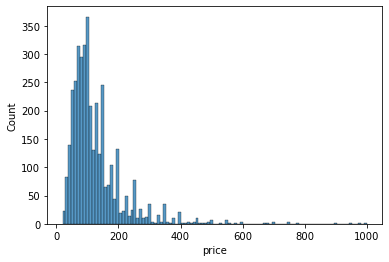

In [12]:
sns.histplot(data=df_listings, x='price');
df_listings['price'].describe()

In general, listings prices trends to follow a normal distribution with a long tail of outlier expensive properties, but he majority of prices are between \\$75 and $150

Now, for the puntual neighborhoods analysis, the "neighborhood_cleansed" column is used as it contains detailed information on the neighborhoods. According to the [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896), it does not have null data and uses the standard geocode nomenclature.

In [13]:
df_neighborhood = pd.DataFrame(df_listings.groupby(['neighbourhood_cleansed']).agg(['mean', 'std'])['price']).sort_values(by = 'mean', ascending=False)
df_neighborhood = df_neighborhood.rename({'mean': 'mean price', 'std': 'std price'}, axis=1)  # new method
print("top ten most expensive neighborhoods")
df_neighborhood.head(10)

top ten most expensive neighborhoods


,mean price,std price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,225.117682
Portage Bay,227.857143,197.523458
Westlake,194.470588,173.057475
West Queen Anne,187.769231,170.476425
Montlake,182.789474,171.700508
Briarcliff,176.571429,96.767536
Sunset Hill,176.055556,149.680630
Industrial District,173.333333,104.769588
Alki,171.619048,97.471685


In [14]:
print("top ten cheapest neighborhoods")
df_neighborhood.sort_values(by = 'mean price', ascending=True).head(10)

top ten cheapest neighborhoods


,mean price,std price
neighbourhood_cleansed,,
Rainier Beach,68.555556,33.465034
Olympic Hills,71.687500,48.098120
South Delridge,74.666667,31.804326
Georgetown,76.125000,15.994977
North Delridge,76.375000,26.881760
Mid-Beacon Hill,79.933333,41.554230
Maple Leaf,80.261905,34.628382
Riverview,80.500000,29.456990
Victory Heights,81.466667,42.811658


In [15]:
print("Most expensive neighborhood:")
pd.DataFrame(df_neighborhood.iloc[0,:])

Most expensive neighborhood:


,Southeast Magnolia
mean price,231.705882
std price,225.117682


In [16]:
print("Most cheapest neighborhood:")
pd.DataFrame(df_neighborhood.iloc[-1,:])

Most cheapest neighborhood:


,Rainier Beach
mean price,68.555556
std price,33.465034


---
Southeast Magnolia is the most expensive neighborhood, with the average listing close to \\$231. Rainer Beach is the cheapest neighborhood, with the average listing close to \\$68

In general, the standard deviations are so high for the majority of neighborhoods. A box plot could better show the distribution of the data for each neighborhood.

---

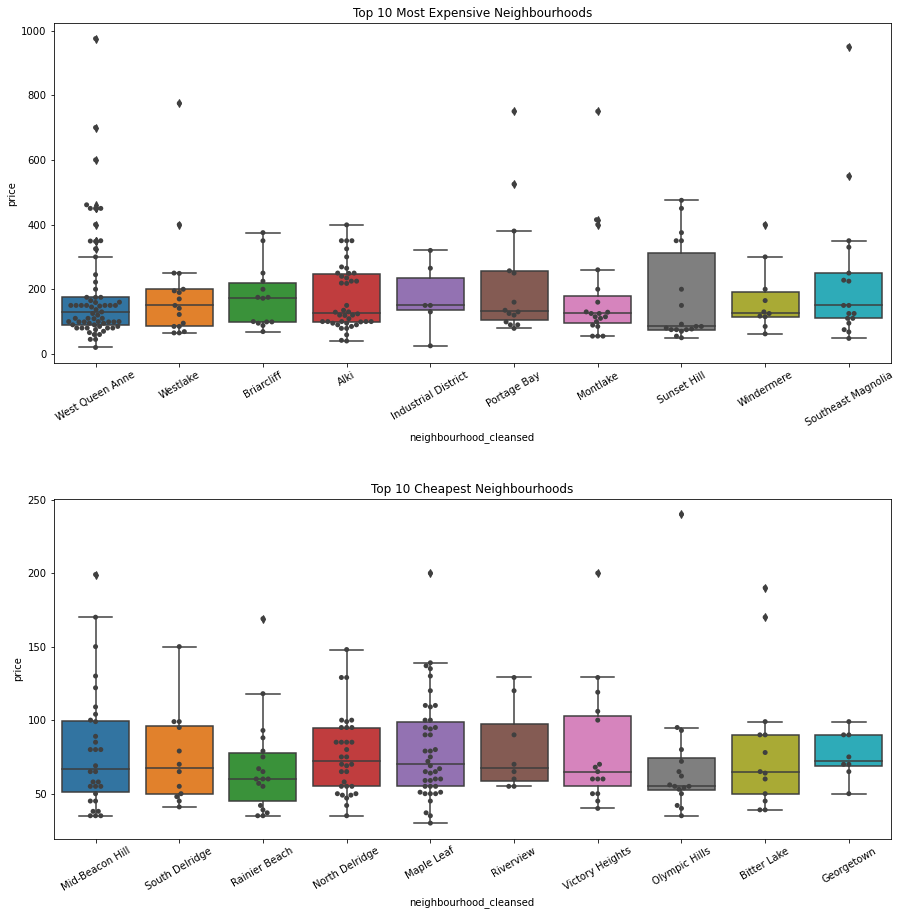

In [17]:
#top ten most expensive an cheapest neighborhoods
neighborhood_list_E = df_neighborhood.head(10).index.to_list()
neighborhood_list_C = df_neighborhood.sort_values(by = 'mean price', ascending=True).head(10).index.to_list()

df_top10_neighborhoodE = df_listings[df_listings['neighbourhood_cleansed'].isin(neighborhood_list_E)]
df_top10_neighborhoodC = df_listings[df_listings['neighbourhood_cleansed'].isin(neighborhood_list_C)]


fig, axs = plt.subplots(2, 1, figsize=(15,15))
plt.subplots_adjust(hspace=0.4)

sns.boxplot(ax=axs[0],x="neighbourhood_cleansed", y="price", data=df_top10_neighborhoodE)
sns.swarmplot(ax=axs[0], x="neighbourhood_cleansed", y="price", data=df_top10_neighborhoodE, color=".25")
axs[0].set_title("Top 10 Most Expensive Neighbourhoods")
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=30);

sns.boxplot(ax=axs[1],x="neighbourhood_cleansed", y="price", data=df_top10_neighborhoodC)
sns.swarmplot(ax=axs[1], x="neighbourhood_cleansed", y="price", data=df_top10_neighborhoodC, color=".25")
axs[1].set_title("Top 10 Cheapest Neighbourhoods")
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=30);

---
Box plot helps to show outliers in the data and differences in neighborhoods in terms of median listing price. All most expensive neighborhoods have outliers greater than \\$500. Many cheapest neighborhoods have outliers greater than $150.

---

## 3. Data Preparation

There are a lot of columns in the listing dataset. Most of them do not contribute to our objective or contain similar information, such as different levels of neighborhood description, URL information, host personal data, or unique columns like ids. Hence, they could be dropped. For detailed description of columns see the [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

For this project, the initial columns selected for the analysis were associated with information about reviews and property characteristics.

In [18]:
# initial variables selection
df_listings_selection = df_listings[['neighbourhood_cleansed',
                               'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
                               'bathrooms', 'bedrooms', 'beds', 'bed_type', 'host_is_superhost', 'number_of_reviews', 
                               'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 
                               'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                               'reviews_per_month','price']]

We are going to see some details of these chosen variables

In [19]:
# Variable behavior
df_listings_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       3818 non-null   object 
 1   latitude                     3818 non-null   float64
 2   longitude                    3818 non-null   float64
 3   property_type                3817 non-null   object 
 4   room_type                    3818 non-null   object 
 5   accommodates                 3818 non-null   int64  
 6   bathrooms                    3802 non-null   float64
 7   bedrooms                     3812 non-null   float64
 8   beds                         3817 non-null   float64
 9   bed_type                     3818 non-null   object 
 10  host_is_superhost            3816 non-null   float64
 11  number_of_reviews            3818 non-null   int64  
 12  review_scores_rating         3171 non-null   float64
 13  review_scores_clea

In [20]:
df_listings.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,0.203878,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,0.402932,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,0.000000,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,0.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,0.000000,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,1.000000,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### 3.1. Null Values

In the selected variables, some have null values. In general, in the property characteristics variables, the number of records with missing data is low (~ 0.6% of total records), so they could be eliminated directly.

On the other hand, the records with missing information in the variables associated with scores in reviews are approximately 20%. This amount is relevant, so we will try to find a way to complete this information. 

The imputing data methodology is a good option to fill in the missing information. Still, depending on the data distribution, it may be better to use the median, mean or mode in some variables. Below the distribution of the reviews variables are shown

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

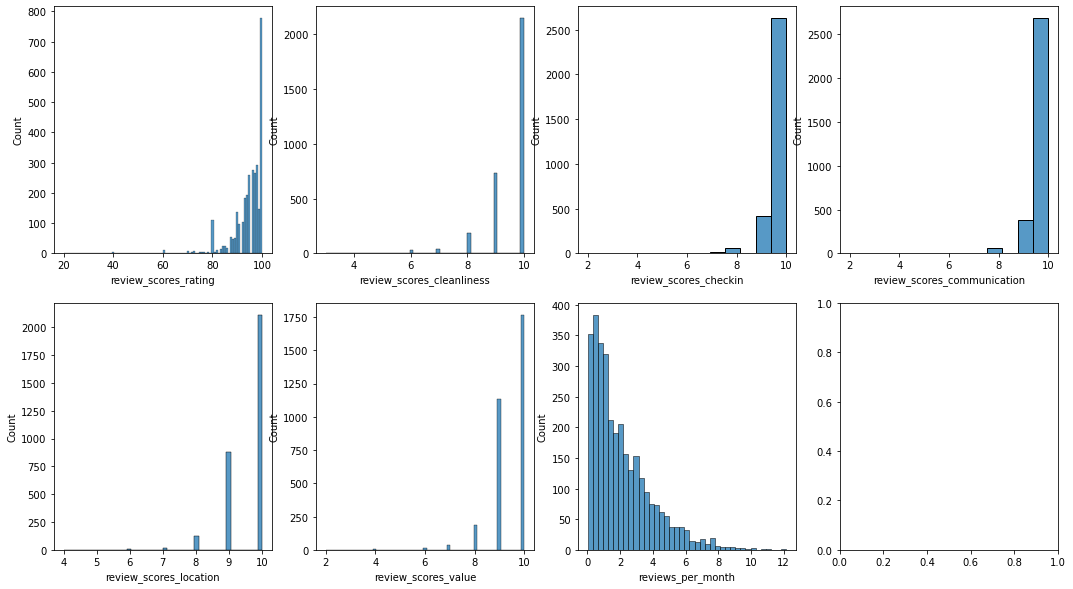

In [21]:
# Deleting records with missing information on property characteristics
df_listings_selection.dropna(subset=['latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms',
                           'beds','bed_type','host_is_superhost'], inplace = True)

# reviews variables data distribution

fig, axs = plt.subplots(2, 4, figsize=(18,10))
#plt.subplots_adjust(hspace=0.4)
sns.histplot(ax=axs[0,0],data=df_listings_selection, x='review_scores_rating')
sns.histplot(ax=axs[0,1], data=df_listings_selection, x='review_scores_cleanliness')
sns.histplot(ax=axs[0,2], data=df_listings_selection, x='review_scores_checkin')
sns.histplot(ax=axs[0,3], data=df_listings_selection, x='review_scores_communication')
sns.histplot(ax=axs[1,0], data=df_listings_selection, x='review_scores_location')
sns.histplot(ax=axs[1,1], data=df_listings_selection, x='review_scores_value')
sns.histplot(ax=axs[1,2], data=df_listings_selection, x='reviews_per_month')

For all variables, a side-loaded distribution is seen. For that reason, the mean could introduce noise into the data. Since the detailed score variables are numerical and ordinal, the best option is to use the mode value for imputation. While in the variables of "review_score_rating" and "reviews_per_month" it is better to use the median. 

**NOTE:** These decisions of imputation measures will be taken into account in the data_cleaning() function

### 3.2. Categorical Variables

To work with categorical variables and answer the main question analyzing linearity between variables, it is recommendable to code them using dummy variables.

For this project, categorical variables will be converted using dummy encoding to create n-1 variables.

**NOTE**: Categorical variables dummification will be developed into the data_cleaning() function

In [22]:
df_listings_selection['beds'].isnull().sum()

0

In [23]:
def data_cleaning(df, imp_dict = {}, resp_variable = ""):
    '''
    INPUT
    df - pandas dataframe 
    imp_dict - dictionary with the relationship between the variable name and the measure chosen to impute. 
               If not specified, the default mean metric is applied
               You can choose between the mean, the median, and the mode
    
    OUTPUT
    df_cleaned - Complete pandas dataframe holding all of the variables you want to consider when predicting the response.
    
    Perform to obtain the correct cleaned dataframe
    This function cleans df using the following steps to produce df_cleaned:
    1. Select the numeric variables in the dataset
    2. Imputes the selected metric to fill null values for numeric variables according to imp_dict.
       If a variable is not reported, the mean is applied to fill null values. The response variable is not taking into account
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Create df_cleaned as all the columns filled and dummyfied
    6. Move response variable at the end of the dataframe to facilitate its search
    
    IMPLEMENTATION EXAMPLE:
    df_resp = data_cleaning(df_original, {'a':'mean', 'b':'mode'}, 'y')

    '''
    df_cleaned = df.copy()
  
    num_vars= df_cleaned.select_dtypes(include=['int','float']).copy().columns.to_list()
    if resp_variable in num_vars:        
        num_vars.remove(resp_variable)
   
    imp_keys = list(imp_dict.keys())
    for var in num_vars:
        if df_cleaned[var].isnull().sum()>0:
            if var in imp_keys:
                if imp_dict[var] == 'mean':
                    df_cleaned[var].fillna((df_cleaned[var].mean()), inplace=True)
                elif imp_dict[var] == 'mode':
                    df_cleaned[var].fillna((df_cleaned[var].mode().iloc[0]), inplace=True)
                elif imp_dict[var] == 'median':
                    df_cleaned[var].fillna((df_cleaned[var].median()), inplace=True)
                else:
                    print("*** WARNING:", imp_dict[var], "is not a valid imputation measure, the mean will be used instead for", var, "variable.")
            else:     
                print("*** WARNING: The mean will be used for", var, "variable imputation.")
                df_cleaned[var].fillna((df_cleaned[var].mean()), inplace=True)

   
    cat_vars = df_cleaned.select_dtypes(include=['object']).copy().columns

   
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df_cleaned = pd.concat([df_cleaned.drop(var, axis=1), pd.get_dummies(df_cleaned[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    
    columns = df_cleaned.columns.to_list()
    columns.remove(resp_variable) 
    columns.append(resp_variable)
    df_cleaned = df_cleaned[columns]
      
    return df_cleaned

We will use the data_cleaning() function to clean the dataframe that we will use in the modeling section

In [24]:
# Dictionary for imputation
imp_dict = {'review_scores_cleanliness': 'mode', 'review_scores_checkin': 'mode', 'review_scores_communication': 'mode', 
           'review_scores_location': 'mode', 'review_scores_value': 'mode', 'review_scores_rating': 'median', 
            'reviews_per_month': 'median'}
# data_cleaning
df_listings_selection = data_cleaning(df_listings_selection, imp_dict, 'price')
df_listings_selection.head(5)

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,host_is_superhost,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,price
0,47.636289,-122.371025,4,1.0,1.0,1.0,0.0,207,95.0,10.0,10.0,10.0,9.0,10.0,4.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

## 4. Modeling

Proceeding with the main question, I have chosen a multiple linear regression model to evaluate if there are linear interactions between the variables and if this linearity is sufficient to predict the price.

### 4.1. Multiple Linear Regression Model

The first step is split train - test subsets. Sklearn train_test_split perform a random split of the total dataset to construct train - test randomly selected datasets. Next, the liner model can be instantiated and fitted

In [25]:
# Data train - test split
X_train, X_test, y_train, y_test = train_test_split(df_listings_selection.drop(columns=['price'], axis=1), df_listings_selection["price"], test_size = .3, random_state=1990) 

# Linear Model
lm_model = LinearRegression(normalize=True).fit(X_train, y_train) #Fit

## 5. Results and Evaluation

There are two widely used metrics to determine the performance of a linear model. These metrics are the R-squared and the Root Mean Square Error (RMSE):

* The R-squared score measures for relative goodness-of-fit. The closer to 1, the better the model fits the data.
* RMSE is an absolute measure of fit. It is a simple and usefull loss function to minimize.

The r-squared score for training data was 0.6171367814450248 and the RMSE was 3155.232501926971
The r-squared score for testing data was 0.5500845187729986 and the RMSE was 3609.184646602338


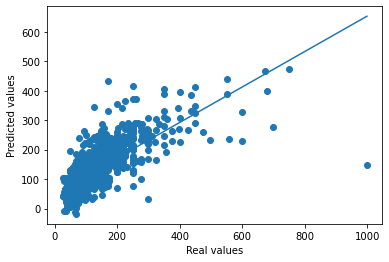

In [26]:
#Predict data and calculate the performance metrics
y_train_preds = lm_model.predict(X_train)
print("The r-squared score for training data was",r2_score(y_train, y_train_preds), "and the RMSE was", mean_squared_error(y_train, y_train_preds))
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for testing data was",r2_score(y_test, y_test_preds), "and the RMSE was", mean_squared_error(y_test, y_test_preds))

#Test predicted values plot
plt.scatter(y_test, y_test_preds)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_preds, 1))(np.unique(y_test)));

The model performs better on the training data than the test data in terms of the r-squared score. This could be due to overfitting in the model caused for outliers in the training data set or behavior of particular actual variables that the model could not generalize. For future analysis to avoid overfitting could be used cross-validation, which is a robust methodology to reduce overfitting.

Although the performance of the model is not outstanding, it is observed that the trend of prices can be represented linearly with some outliers

# Final Remarks

The main takeaways from this analysis have been the following:

1. Prices have a normal distribution with some extreme values associated with very expensive properties. In general, the price of a "standard" property should not exceed \\$200.

2. Reviews do not directly affect pricing, as no direct relationship was found between variables. However, there are two ways to interpret the behavior of the reviews: **a.** Low prices attract customers who can review the property much more than a more expensive property. However, that does not mean that the reviews are good. **b.** Expensive properties have good scores but are not necessarily associated with a large number of reviews.
These two routes of analysis could be evaluated in detail in future works.

3. A linear algorithm could model linear realizations between the variables and the listing price in Seattle. However, non-linear analysis algorithms could better interpret and generalize the behavior of the variables, increasing the predictive power. More variables could also be analyzed to improve the performance of the models.